# Assignment 1 - Deep Learning

Nama: Rafi Solichin  
Pada assignment ini, akan dilakukan eksperimen tensorflow deep learning dengan menggunakan [dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) heart desease-processed cleveland. Asumsikan target diubah menjadi 0-1 dikarenakan tertulis pada dokumentasi bahwa predicted label hanya ada 2 kategori.  
<br>
**Eksperimen 1** Menggunakan optimizer RMSprop dengan parameter:
* Learning rate = [0.1, 0.01, 0.001, 0.0001]
* rho = [0.0, 0.2, 0.7, 0.9]
* momentum = [0.0, 0.3, 0.7. 0.9]  

**Eksperimen 2**
Menggunakan optimizer SGD dengan parameter:
* Learning rate = [0.1, 0.01, 0.001, 0.0001]
* momentum = [0.0, 0.3, 0.7, 0.9]


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [14]:
#download dataset
!wget --no-check-certificate \
  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data \
  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

--2021-09-12 06:39:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.06s   

2021-09-12 06:39:07 (281 KB/s) - ‘processed.cleveland.data’ saved [18461/18461]

--2021-09-12 06:39:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: 10060 (9.8K) [application/x-httpd-php]
Saving to: ‘heart-disease.names’

heart-disease.names 100%[===================>]   9.82K  --.-KB/s    in 0s      

2021-09-12 06:39:07 (66.2 MB/s) - ‘heart-d

In [307]:
#dokumentasi dataset
with open('/content/heart-disease.names') as file:
  note= file.read()
print(note)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

**Attribute Information**:  
* age : age in years
* sex : sex
  * value 1: male
  * value 0: female
* cp : chest pain type
  * value 1: typical angina
  * value 2: atypical angina
  * value 3: non-anginal pain
  * value 4: asymptomatic
* trestbps : resting blood pressure (in hg on admission to the hospital)
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl)
  * value 1: True
  * value 0: False
* restecg : resting electrocardiographic results
  * value 0: normal
  * value 1: ST-T wave abnormality
  * value 2: left ventricular hypertrophy
* thalach : maximum heart rate achieved
* exang : exercise induced angina
  * value 0: no
  * value 1: yes
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
  * value 1: upsloping
  * value 2: flat
  * value 3: downsloping
* ca : number of major vessels
  * value 0: ca1
  * value 1: ca2
  * value 2: ca3
  * value 3: ca4
* thal :
  * value 3: normal
  * value 6: fixed defect
  * value 7: reversable defect
* target

In [335]:
#baca data
columns= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data= pd.read_csv('/content/processed.cleveland.data', sep=',', names=columns)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


missing value percentage:

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


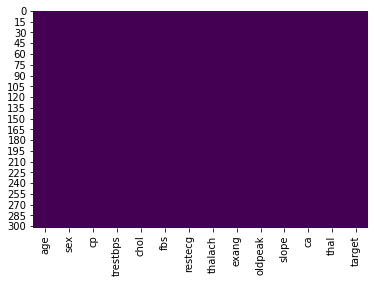

In [337]:
#cek missing value
def check_missing(data):
  print("missing value percentage:\n")
  print(round(np.mean(data.isnull())*100,2))
  sns.heatmap(data.isnull(), cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))

check_missing(data)

In [338]:
#cek categorical atribut unique
categorical_col= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for i in categorical_col:
  print('{}: {}'.format(i, data[i].unique()))

sex: [1. 0.]
cp: [1. 4. 3. 2.]
fbs: [1. 0.]
restecg: [2. 0. 1.]
exang: [0. 1.]
slope: [3. 2. 1.]
ca: ['0.0' '3.0' '2.0' '1.0' '?']
thal: ['6.0' '3.0' '7.0' '?']
target: [0 2 1 3 4]


In [339]:
#drop non value data
drop_index = data[(data['ca'] == '?')|(data['thal'] == '?')].index
data.drop(drop_index, inplace= True)

In [340]:
#encoding process
#ubah target menjadi 0-1
data.replace(
    {'sex': {0: 'female', 1: 'male'},
     'cp': {1:'typical angina', 2:'atypical angina', 3:'non-anginal pain', 4:'asymptomatic'},
     'fbs': {0:'false', 1:'true'},
     'restecg': {0:'normal', 1:'wa', 2: 'vh'},
     'exang': {0:'no', 1: 'yes'},
     'slope': {1:'up', 2:'flat', 3:'down'},
     'ca': {'0.0':'ca1', '1.0':'ca2', '2.0':'ca3', '3.0':'ca4'},
     'thal': {'3.0':'normal', '6.0':'fixed defect', '7.0':'reverseable defect'},
     'target': {0: 'target1', 1:'target2', 2:'target2', 3:'target2', 4:'target2'}
     }
     , inplace=True
)

encoded = pd.get_dummies(data, columns = categorical_col)
encoded

,age,trestbps,chol,thalach,oldpeak,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_false,fbs_true,restecg_normal,restecg_vh,restecg_wa,exang_no,exang_yes,slope_down,slope_flat,slope_up,ca_ca1,ca_ca2,ca_ca3,ca_ca4,thal_fixed defect,thal_normal,thal_reverseable defect,target_target1,target_target2
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1
2,67.0,120.0,229.0,129.0,2.6,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1
298,45.0,110.0,264.0,132.0,1.2,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1
299,68.0,144.0,193.0,141.0,3.4,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1


In [341]:
#x-y train-test split process
x= encoded[encoded.columns[:-2]].values
y= encoded[encoded.columns[-2:]].values

xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= 0.2, random_state= 12)

# Eksperimen 1

In [342]:
#build architecture function
def rmspropModel_lr(xtrain, ytrain, xtest, ytest, lr):
  model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  model.compile(
      #create with default rho and momentum
      optimizer= tf.keras.optimizers.RMSprop(learning_rate=lr),
      loss= 'categorical_crossentropy',
      metrics= ['accuracy']
  )
  history= model.fit(
      xtrain, ytrain,
      batch_size= 16,
      epochs= 250,
      validation_data=(xtest, ytest),
      verbose= 0
  )
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('lrate= '+str(lr))
  plt.legend()

In [344]:
def rmspropModel_rho(xtrain, ytrain, xtest, ytest, rho):
  model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  model.compile(
      #create with learning_rate= 0.0001 and default momentum
      optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho= rho),
      loss= 'categorical_crossentropy',
      metrics= ['accuracy']
  )
  history= model.fit(
      xtrain, ytrain,
      batch_size= 16,
      epochs= 250,
      validation_data=(xtest, ytest),
      verbose= 0
  )
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('rho= '+str(rho))
  plt.legend()

In [354]:
def rmspropModel_mom(xtrain, ytrain, xtest, ytest, mom):
  model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  model.compile(
      #create with learning_rate= 0.0001 and default rho
      optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum= mom),
      loss= 'categorical_crossentropy',
      metrics= ['accuracy']
  )
  history= model.fit(
      xtrain, ytrain,
      batch_size= 16,
      epochs= 250,
      validation_data=(xtest, ytest),
      verbose= 0
  )
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('momentum= '+str(mom))
  plt.legend()

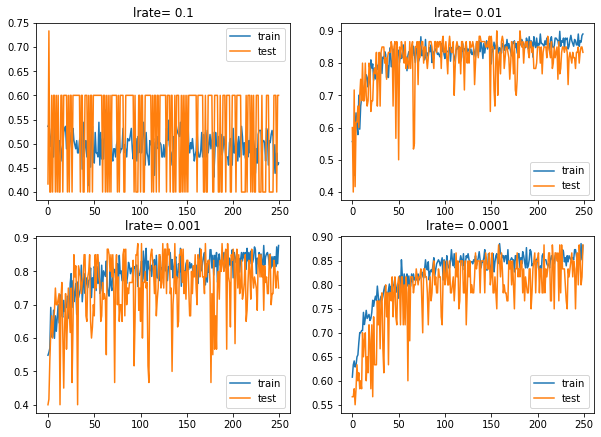

In [346]:
#rmsprop dengan perbedaan learning rate
learning_rates= [0.1, 0.01, 0.001, 0.0001]
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    rmspropModel_lr(xtrain, ytrain, xtest, ytest, learning_rates[i])

# show learning curves
plt.show()

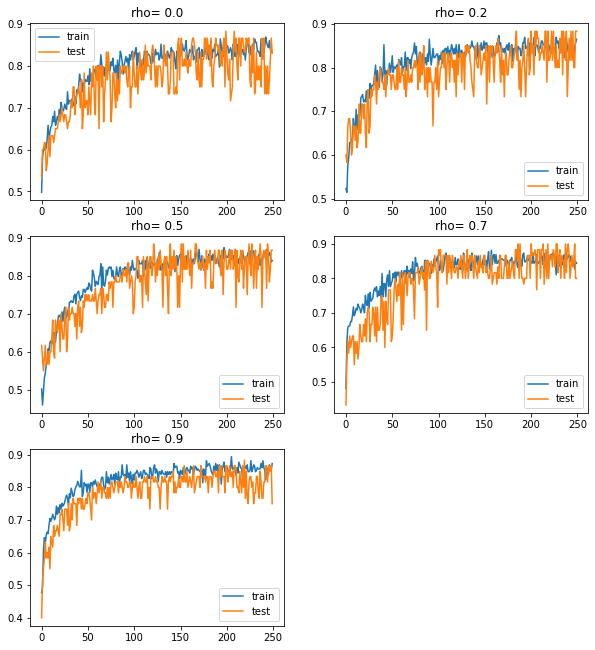

In [357]:
#rmsprop dengan perbedaan rho
rhos= [0.0, 0.2, 0.5, 0.7, 0.9]
plt.figure(figsize=(10, 15))
for i in range(len(rhos)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    rmspropModel_rho(xtrain, ytrain, xtest, ytest, rhos[i])

# show learning curves
plt.show()

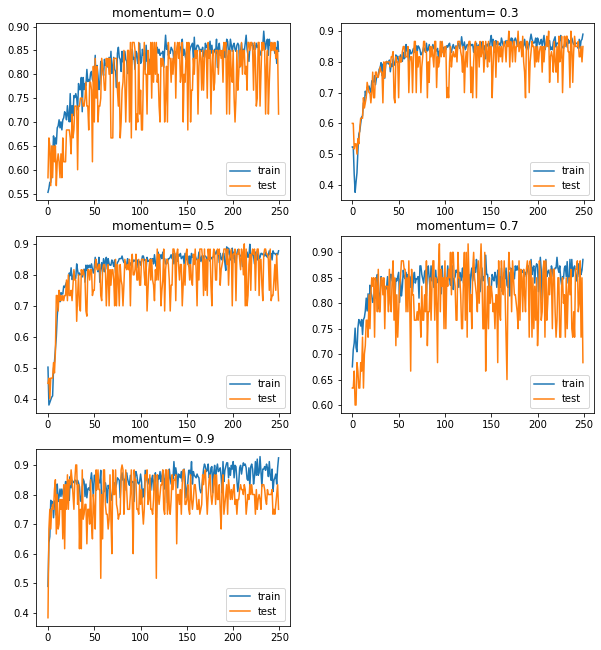

In [358]:
#rmsprop dengan perbedaan momentum
momentums= [0.0, 0.3, 0.5, 0.7, 0.9]
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    rmspropModel_mom(xtrain, ytrain, xtest, ytest, momentums[i])

# show learning curves
plt.show()

# Eksperimen 2

In [356]:
#build architecture function
def sgdModel_lr(xtrain, ytrain, xtest, ytest, lr):
  model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  model.compile(
      #create with default momentum
      optimizer= tf.keras.optimizers.SGD(learning_rate=lr),
      loss= 'categorical_crossentropy',
      metrics= ['accuracy']
  )
  history= model.fit(
      xtrain, ytrain,
      batch_size= 16,
      epochs= 250,
      validation_data=(xtest, ytest),
      verbose= 0
  )
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('lrate= '+str(lr))
  plt.legend()

In [361]:
#build architecture function
def sgdModel_mom(xtrain, ytrain, xtest, ytest, mom):
  model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  model.compile(
      #create with learning_rate= 0,0001
      optimizer= tf.keras.optimizers.SGD(learning_rate=0.0001, momentum= mom),
      loss= 'categorical_crossentropy',
      metrics= ['accuracy']
  )
  history= model.fit(
      xtrain, ytrain,
      batch_size= 16,
      epochs= 250,
      validation_data=(xtest, ytest),
      verbose= 0
  )
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('momentum= '+str(mom))
  plt.legend()

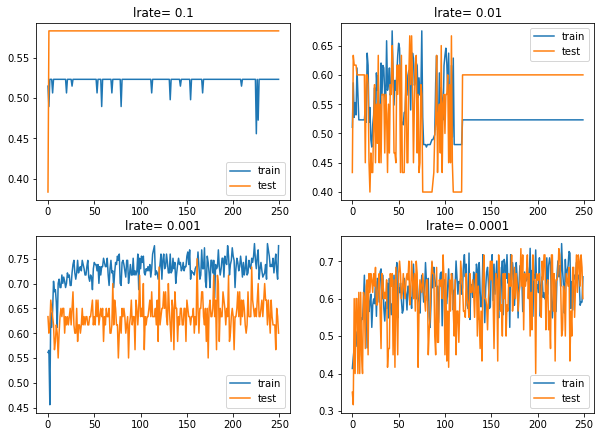

In [359]:
#rmsprop dengan perbedaan learning rate
learning_rates= [0.1, 0.01, 0.001, 0.0001]
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    sgdModel_lr(xtrain, ytrain, xtest, ytest, learning_rates[i])

# show learning curves
plt.show()

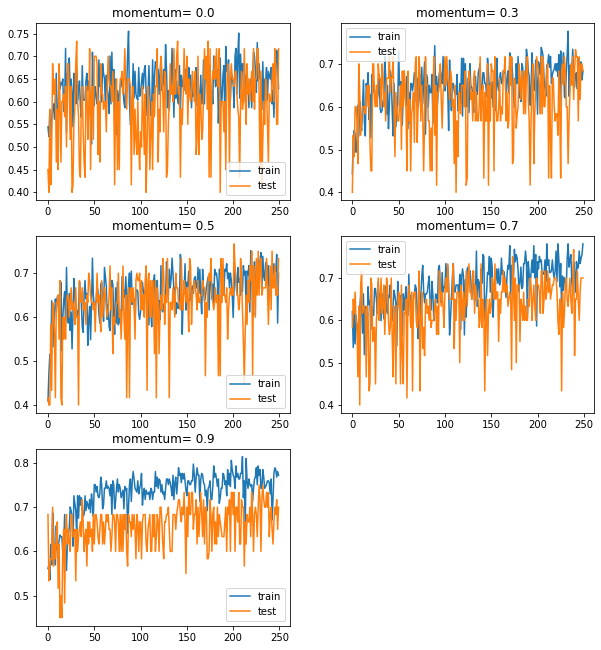

In [362]:
#rmsprop dengan perbedaan momentum
momentums= [0.0, 0.3, 0.5, 0.7, 0.9]
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    sgdModel_mom(xtrain, ytrain, xtest, ytest, momentums[i])

# show learning curves
plt.show()

# Create the best model

In [367]:
#Deep learning Architechture
#using rmsprop optimizer
#learning rate = 0.0001
#rho = 0.7
#momentum = 0.2
best_model= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

best_model.compile(
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.7, momentum=0.2),
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [368]:
bestModel_history= best_model.fit(
    xtrain, ytrain,
    epochs= 500,
    batch_size= 16,
    validation_data= (xtest, ytest)
)

Epoch 1/500
15/15 [==============================] - 1s 15ms/step - loss: 18.3480 - accuracy: 0.5232 - val_loss: 12.1354 - val_accuracy: 0.6000
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 10.7850 - accuracy: 0.5232 - val_loss: 5.6458 - val_accuracy: 0.6000
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 3.8928 - accuracy: 0.5021 - val_loss: 2.1089 - val_accuracy: 0.4167
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 2.0603 - accuracy: 0.4008 - val_loss: 1.7739 - val_accuracy: 0.5333
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6689 - accuracy: 0.4515 - val_loss: 1.3884 - val_accuracy: 0.5000
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 1.3243 - accuracy: 0.4599 - val_loss: 1.0772 - val_accuracy: 0.4833
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0239 - accuracy: 0.4979 - val_loss: 0.8464 - val_accuracy: 0.5833
Epoch 8/5

[]

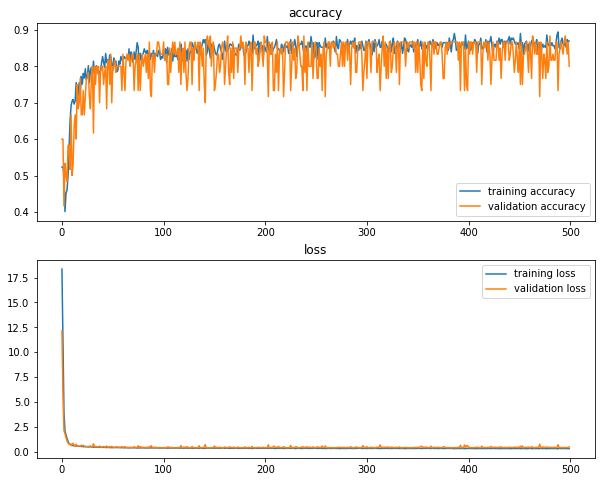

In [369]:
fig, axs = plt.subplots(2, figsize=(10,8))

acc= bestModel_history.history["accuracy"]
val_acc= bestModel_history.history["val_accuracy"]
loss= bestModel_history.history["loss"]
val_loss= bestModel_history.history["val_loss"]
epochs = range(len(acc))

plt.title("accuracy and loss graphic")
axs[0].plot(epochs, acc, label='training accuracy')
axs[0].plot(epochs, val_acc, label='validation accuracy')
axs[0].set_title('accuracy')
axs[0].legend()
axs[1].plot(epochs, loss, label='training loss')
axs[1].plot(epochs, val_loss, label='validation loss')
axs[1].set_title('loss')
axs[1].legend()
plt.plot()